# 🎯 NOTEBOOK 7: PROYECTO FINAL - Clasificador de Sentimientos

## 🎉 ¡BIENVENIDO AL PROYECTO FINAL!

Este es el momento que has estado esperando. Vas a integrar **TODO** lo que has aprendido en los notebooks anteriores:

✅ **Notebook 1:** NumPy para manipular datos  
✅ **Notebook 2:** Pandas para organizar datasets  
✅ **Notebook 3:** Matplotlib para visualizar resultados  
✅ **Notebook 4:** Scikit-learn para procesar texto  
✅ **Notebook 5:** Keras para construir redes neuronales  
✅ **Notebook 6:** Regularización para evitar overfitting  

---

## 🎯 OBJETIVO DEL PROYECTO

Crear un **clasificador de sentimientos** que determine si una opinión es **positiva** o **negativa**.

**Ejemplos:**
- "Me encanta este producto" → 😊 **POSITIVO**
- "Pésima experiencia" → 😞 **NEGATIVO**

---

## ⏱️ Duración estimada: 90 minutos

---

## 📋 FASES DEL PROYECTO

1. 📊 **Preparar el dataset** (frases + etiquetas)
2. 🔤 **Vectorizar el texto** (Bag of Words)
3. ✂️ **Dividir datos** (train/test)
4. 🏗️ **Construir la red neuronal**
5. 🏋️ **Entrenar el modelo**
6. 📈 **Visualizar el aprendizaje**
7. 📊 **Evaluar rendimiento**
8. 🔮 **Probar con frases nuevas**
9. 🎨 **Dashboard final**

---

## 📦 PASO 0: Importar todas las librerías

Vamos a importar todo lo necesario de una vez.

In [19]:
# Librerías básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Procesamiento de texto
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Deep Learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

# Configuración de gráficas
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ TODAS LAS LIBRERÍAS IMPORTADAS")
print("="*60)
print("🎯 ¡Listo para comenzar el proyecto final!")

✅ TODAS LAS LIBRERÍAS IMPORTADAS
🎯 ¡Listo para comenzar el proyecto final!


---

## 📊 PASO 1: Preparar el Dataset

Vamos a crear un dataset de opiniones con **frases positivas y negativas**.

In [20]:
print("📊 CREANDO DATASET DE SENTIMIENTOS")
print("="*60)

# Frases positivas
frases_positivas = [
    "Me encanta este producto",
    "Excelente calidad",
    "Muy satisfecho con la compra",
    "Superó mis expectativas",
    "Lo recomiendo totalmente",
    "Perfecto justo lo que buscaba",
    "Increíble experiencia",
    "Volveré a comprar sin duda",
    "Calidad precio excelente",
    "Estoy muy feliz con esto",
    "Fantástico producto",
    "Mejor de lo esperado",
    "Totalmente recomendable",
    "Me ha encantado",
    "Producto de alta calidad",
    "Muy buena compra",
    "Satisfecho completamente",
    "Gran producto",
    "Funciona perfectamente",
    "Excelente servicio"
]

# Frases negativas
frases_negativas = [
    "Muy decepcionado",
    "Mala calidad",
    "No lo recomiendo",
    "Pésima experiencia",
    "No cumple lo prometido",
    "Pérdida de dinero",
    "Terrible servicio",
    "No volvería a comprar",
    "Muy por debajo de lo esperado",
    "Completamente insatisfecho",
    "Producto defectuoso",
    "Malísima compra",
    "No funciona bien",
    "Decepcionante y caro",
    "No vale la pena",
    "Horrible producto",
    "Muy mala experiencia",
    "No sirve para nada",
    "Pésima calidad",
    "Nunca más"
]

# Combinar
todas_frases = frases_positivas + frases_negativas
etiquetas = [1] * len(frases_positivas) + [0] * len(frases_negativas)

# Crear DataFrame
df = pd.DataFrame({
    'Frase': todas_frases,
    'Sentimiento': ['Positivo'] * len(frases_positivas) + ['Negativo'] * len(frases_negativas),
    'Etiqueta': etiquetas
})

print(f"Total de frases: {len(df)}")
print(f"Positivas: {sum(etiquetas)} ({sum(etiquetas)/len(etiquetas)*100:.0f}%)")
print(f"Negativas: {len(etiquetas)-sum(etiquetas)} ({(len(etiquetas)-sum(etiquetas))/len(etiquetas)*100:.0f}%)")
print(f"\n✅ Dataset balanceado: {sum(etiquetas) == len(etiquetas)-sum(etiquetas)}")
print()
print("📝 Ejemplos del dataset:")
print(df.head(5))
print("...")
print(df.tail(5))

📊 CREANDO DATASET DE SENTIMIENTOS
Total de frases: 40
Positivas: 20 (50%)
Negativas: 20 (50%)

✅ Dataset balanceado: True

📝 Ejemplos del dataset:
                          Frase Sentimiento  Etiqueta
0      Me encanta este producto    Positivo         1
1             Excelente calidad    Positivo         1
2  Muy satisfecho con la compra    Positivo         1
3       Superó mis expectativas    Positivo         1
4      Lo recomiendo totalmente    Positivo         1
...
                   Frase Sentimiento  Etiqueta
35     Horrible producto    Negativo         0
36  Muy mala experiencia    Negativo         0
37    No sirve para nada    Negativo         0
38        Pésima calidad    Negativo         0
39             Nunca más    Negativo         0


### ✍️ AHORA TÚ: Añade tus propias frases

**Completa el código siguiente:**

In [21]:
# EJERCICIO 1: Añade 3 frases positivas y 3 negativas

mis_frases_positivas = [
    "Este producto es absolutamente fantástico",
    "Estoy muy contento con el servicio recibido",
    "Una experiencia maravillosa de principio a fin"
]

mis_frases_negativas = [
    "El pedido llegó tarde y en mal estado",
    "No volvería a comprar aquí nunca más",
    "La calidad del material es decepcionante"
]

# Añadir al dataset
todas_frases_ampliado = todas_frases + mis_frases_positivas + mis_frases_negativas
etiquetas_ampliado = etiquetas + [1]*3 + [0]*3

print(f"✅ Dataset ampliado: {len(todas_frases_ampliado)} frases totales")

✅ Dataset ampliado: 46 frases totales


---

## 🔤 PASO 2: Vectorizar el Texto (Bag of Words)

Convertimos las frases en vectores numéricos que la red neuronal puede procesar.

In [22]:
print("\n🔤 VECTORIZANDO TEXTO CON BAG OF WORDS")
print("="*60)

# EJERCICIO 2: Crea el vectorizador
vectorizador = CountVectorizer()

# Transformar las frases
X = vectorizador.fit_transform(todas_frases_ampliado).toarray()
y = np.array(etiquetas_ampliado)

print(f"✅ Vectorización completada")
print(f"Forma de X: {X.shape}")
print(f"   - {X.shape[0]} documentos (frases)")
print(f"   - {X.shape[1]} características (palabras únicas)")
print()

# Explorar el vocabulario
vocabulario = vectorizador.vocabulary_
print(f"📖 Vocabulario: {len(vocabulario)} palabras únicas")
print(f"\nPrimeras 15 palabras:")
palabras_ordenadas = sorted(vocabulario.keys())
print(palabras_ordenadas[:15])
print()

# Visualizar frecuencias
frecuencias = X.sum(axis=0)
palabras_frecuentes = sorted(zip(palabras_ordenadas, frecuencias), key=lambda x: x[1], reverse=True)[:10]

print("📊 Top 10 palabras más frecuentes:")
for palabra, freq in palabras_frecuentes:
    print(f"   '{palabra}': {int(freq)} veces")


🔤 VECTORIZANDO TEXTO CON BAG OF WORDS
✅ Vectorización completada
Forma de X: (46, 89)
   - 46 documentos (frases)
   - 89 características (palabras únicas)

📖 Vocabulario: 89 palabras únicas

Primeras 15 palabras:
['absolutamente', 'alta', 'aquí', 'bien', 'buena', 'buscaba', 'calidad', 'caro', 'completamente', 'compra', 'comprar', 'con', 'contento', 'cumple', 'de']

📊 Top 10 palabras más frecuentes:
   'muy': 7 veces
   'no': 7 veces
   'producto': 7 veces
   'calidad': 6 veces
   'lo': 6 veces
   'de': 5 veces
   'experiencia': 4 veces
   'compra': 3 veces
   'comprar': 3 veces
   'con': 3 veces


---

## ✂️ PASO 3: Dividir en Train y Test

Separamos los datos para entrenar y evaluar el modelo.

In [23]:
print("\n✂️ DIVIDIENDO DATOS EN TRAIN Y TEST")
print("="*60)

# EJERCICIO 3: Divide los datos (20% para test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"✅ División completada")
print()
print("📊 CONJUNTO DE ENTRENAMIENTO:")
print(f"   Tamaño: {X_train.shape[0]} frases ({X_train.shape[0]/len(X)*100:.0f}%)")
print(f"   Positivas: {sum(y_train)} ({sum(y_train)/len(y_train)*100:.1f}%)")
print(f"   Negativas: {len(y_train)-sum(y_train)} ({(len(y_train)-sum(y_train))/len(y_train)*100:.1f}%)")
print()
print("📊 CONJUNTO DE TEST:")
print(f"   Tamaño: {X_test.shape[0]} frases ({X_test.shape[0]/len(X)*100:.0f}%)")
print(f"   Positivas: {sum(y_test)} ({sum(y_test)/len(y_test)*100:.1f}%)")
print(f"   Negativas: {len(y_test)-sum(y_test)} ({(len(y_test)-sum(y_test))/len(y_test)*100:.1f}%)")


✂️ DIVIDIENDO DATOS EN TRAIN Y TEST
✅ División completada

📊 CONJUNTO DE ENTRENAMIENTO:
   Tamaño: 36 frases (78%)
   Positivas: 18 (50.0%)
   Negativas: 18 (50.0%)

📊 CONJUNTO DE TEST:
   Tamaño: 10 frases (22%)
   Positivas: 5 (50.0%)
   Negativas: 5 (50.0%)


---

## 🏗️ PASO 4: Construir la Red Neuronal

Creamos un modelo con regularización para evitar overfitting.

In [24]:
print("\n🏗️ CONSTRUYENDO LA RED NEURONAL")
print("="*60)

# EJERCICIO 4: Completa la arquitectura del modelo
modelo = Sequential([
    Dense(8, input_dim=X_train.shape[1], activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compilar el modelo
modelo.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("✅ Modelo creado y compilado")
print()
modelo.summary()
print()
print("🎯 Arquitectura simple pero efectiva:")
print("   - Capa oculta: 8 neuronas con ReLU")
print("   - Capa salida: 1 neurona con Sigmoid (clasificación binaria)")
print("   - Optimizador: Adam")
print("   - Función de pérdida: Binary Crossentropy")


🏗️ CONSTRUYENDO LA RED NEURONAL
✅ Modelo creado y compilado



/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 8)              │           720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 729 (2.85 KB)

 Trainable params: 729 (2.85 KB)

 Non-trainable params: 0 (0.00 B)


🎯 Arquitectura simple pero efectiva:
   - Capa oculta: 8 neuronas con ReLU
   - Capa salida: 1 neurona con Sigmoid (clasificación binaria)
   - Optimizador: Adam
   - Función de pérdida: Binary Crossentropy


---

## 🏋️ PASO 5: Entrenar el Modelo

¡Hora de entrenar! El modelo aprenderá a distinguir sentimientos.

In [25]:
print("\n🏋️ ENTRENANDO EL MODELO")
print("="*60)
print("⏳ Esto puede tardar unos segundos...")
print()

# EJERCICIO 5: Completa los parámetros de entrenamiento
historial = modelo.fit(
    X_train,
    y_train,
    epochs=30,
    batch_size=4,
    validation_data=(X_test, y_test),
    verbose=1
)

print("\n✅ ¡ENTRENAMIENTO COMPLETADO!")
print()
print("📊 Métricas finales:")
print(f"   Loss entrenamiento: {historial.history['loss'][-1]:.4f}")
print(f"   Loss validación: {historial.history['val_loss'][-1]:.4f}")
print(f"   Accuracy entrenamiento: {historial.history['accuracy'][-1]:.2%}")
print(f"   Accuracy validación: {historial.history['val_accuracy'][-1]:.2%}")


🏋️ ENTRENANDO EL MODELO
⏳ Esto puede tardar unos segundos...

Epoch 1/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5214 - loss: 0.7095 - val_accuracy: 0.4000 - val_loss: 0.7431
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6654 - loss: 0.6772 - val_accuracy: 0.4000 - val_loss: 0.7435
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5995 - loss: 0.6990 - val_accuracy: 0.3000 - val_loss: 0.7436
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6969 - loss: 0.6642 - val_accuracy: 0.3000 - val_loss: 0.7439
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7619 - loss: 0.6785 - val_accuracy: 0.3000 - val_loss: 0.7447
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7110 - loss: 0.6757 - val_accuracy: 0.3000 - val_loss: 0.7444
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6546 - loss: 0.6656 - val_accuracy: 0.3000 - val_loss: 0.7449
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8382

---

## 📈 PASO 6: Visualizar el Aprendizaje

Vamos a ver gráficamente cómo aprendió el modelo.


📈 VISUALIZANDO EL APRENDIZAJE


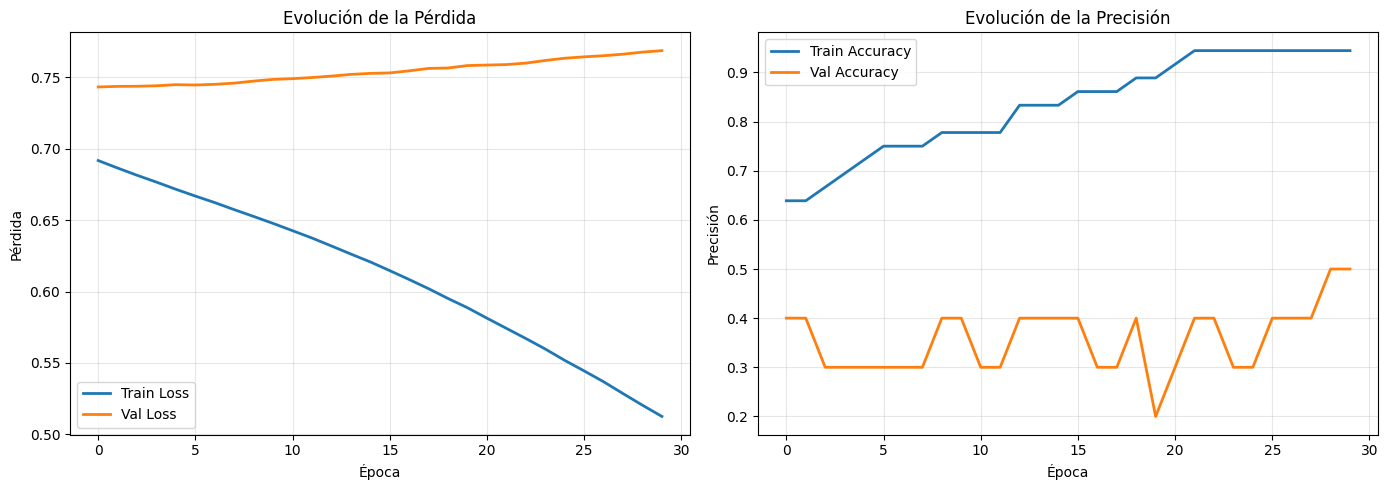


🔍 DIAGNÓSTICO:
Brecha de pérdida: 0.2559
Brecha de precisión: 44.44%

❌ Overfitting significativo: Considera añadir regularización


In [26]:
print("\n📈 VISUALIZANDO EL APRENDIZAJE")
print("="*60)

plt.figure(figsize=(14, 5))

# EJERCICIO 6: Completa las gráficas
# Gráfica de pérdida
plt.subplot(1, 2, 1)
plt.plot(historial.history['loss'], label='Train Loss', linewidth=2)
plt.plot(historial.history['val_loss'], label='Val Loss', linewidth=2)
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Evolución de la Pérdida')
plt.legend()
plt.grid(True, alpha=0.3)

# Gráfica de precisión
plt.subplot(1, 2, 2)
plt.plot(historial.history['accuracy'], label='Train Accuracy', linewidth=2)
plt.plot(historial.history['val_accuracy'], label='Val Accuracy', linewidth=2)
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.title('Evolución de la Precisión')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Diagnóstico de overfitting
brecha_loss = historial.history['val_loss'][-1] - historial.history['loss'][-1]
brecha_acc = historial.history['accuracy'][-1] - historial.history['val_accuracy'][-1]

print("\n🔍 DIAGNÓSTICO:")
print(f"Brecha de pérdida: {brecha_loss:.4f}")
print(f"Brecha de precisión: {brecha_acc:.2%}")
print()
if brecha_loss < 0.1 and brecha_acc < 0.05:
    print("✅ Excelente: No hay overfitting")
elif brecha_loss < 0.3 and brecha_acc < 0.15:
    print("⚠️ Overfitting leve: Aceptable")
else:
    print("❌ Overfitting significativo: Considera añadir regularización")

---

## 📊 PASO 7: Evaluar Rendimiento

Evaluamos el modelo en el conjunto de test.


📊 EVALUACIÓN EN CONJUNTO DE TEST
Pérdida en test: 0.7685
Precisión en test: 50.00%

📋 REPORTE DE CLASIFICACIÓN:
              precision    recall  f1-score   support

    Negativo       0.50      0.40      0.44         5
    Positivo       0.50      0.60      0.55         5

    accuracy                           0.50        10
   macro avg       0.50      0.50      0.49        10
weighted avg       0.50      0.50      0.49        10



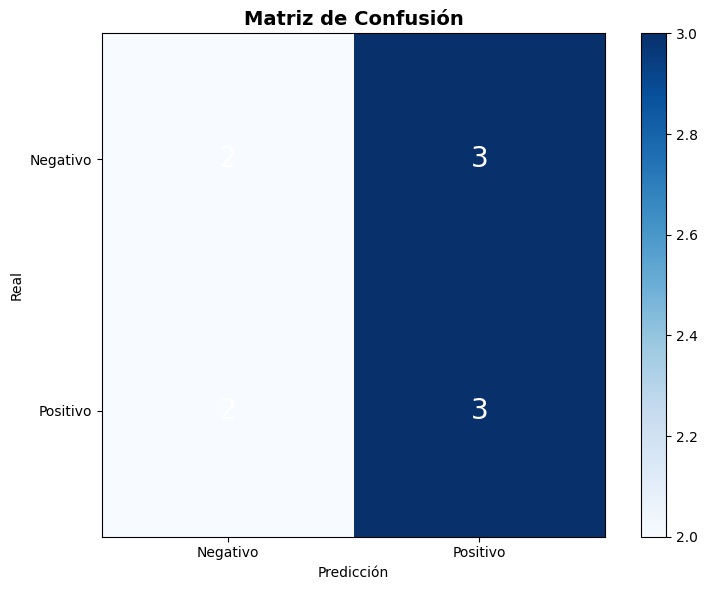


💡 INTERPRETACIÓN:
   Verdaderos negativos: 2
   Falsos positivos: 3
   Falsos negativos: 2
   Verdaderos positivos: 3


In [27]:
print("\n📊 EVALUACIÓN EN CONJUNTO DE TEST")
print("="*60)

# Evaluar
loss_test, acc_test = modelo.evaluate(X_test, y_test, verbose=0)

print(f"Pérdida en test: {loss_test:.4f}")
print(f"Precisión en test: {acc_test:.2%}")
print()

# Predicciones
predicciones = modelo.predict(X_test, verbose=0)
predicciones_clase = (predicciones > 0.5).astype(int).flatten()

# Métricas detalladas
from sklearn.metrics import classification_report, confusion_matrix

print("📋 REPORTE DE CLASIFICACIÓN:")
print(classification_report(y_test, predicciones_clase, target_names=['Negativo', 'Positivo']))

# Matriz de confusión
cm = confusion_matrix(y_test, predicciones_clase)
plt.figure(figsize=(8, 6))
plt.imshow(cm, cmap='Blues', interpolation='nearest')
plt.title('Matriz de Confusión', fontsize=14, fontweight='bold')
plt.colorbar()
plt.xticks([0, 1], ['Negativo', 'Positivo'])
plt.yticks([0, 1], ['Negativo', 'Positivo'])
plt.xlabel('Predicción')
plt.ylabel('Real')

# Añadir valores
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center', fontsize=20, color='white' if cm[i, j] > cm.max()/2 else 'black')

plt.tight_layout()
plt.show()

print("\n💡 INTERPRETACIÓN:")
print(f"   Verdaderos negativos: {cm[0,0]}")
print(f"   Falsos positivos: {cm[0,1]}")
print(f"   Falsos negativos: {cm[1,0]}")
print(f"   Verdaderos positivos: {cm[1,1]}")

---

## 🔮 PASO 8: Probar con Frases Nuevas

¡Hora de probar el modelo con frases que nunca ha visto!

In [28]:
print("\n🔮 PROBANDO CON FRASES NUEVAS")
print("="*60)

def predecir_sentimiento(frase):
    """Predice el sentimiento de una frase"""
    # Vectorizar la frase
    X_nueva = vectorizador.transform([frase]).toarray()

    # Predecir
    prediccion = modelo.predict(X_nueva, verbose=0)[0][0]

    # Determinar sentimiento
    if prediccion > 0.5:
        sentimiento = "😊 POSITIVO"
        emoji = "✅"
    else:
        sentimiento = "😞 NEGATIVO"
        emoji = "❌"

    # Mostrar resultado
    print(f"{emoji} '{frase}'")
    print(f"   → {sentimiento} (confianza: {prediccion:.2%})")
    print()

# Frases de prueba
frases_prueba = [
    "Me gusta mucho este curso",
    "No me gusta para nada",
    "Increíble calidad",
    "Horrible experiencia",
    "Está bien pero podría mejorar",
    "Fantástico producto y servicio",
    "Muy decepcionante",
    "Perfecto para mis necesidades"
]

print("🧪 PREDICCIONES:")
print()
for frase in frases_prueba:
    predecir_sentimiento(frase)


🔮 PROBANDO CON FRASES NUEVAS
🧪 PREDICCIONES:

✅ 'Me gusta mucho este curso'
   → 😊 POSITIVO (confianza: 60.50%)

❌ 'No me gusta para nada'
   → 😞 NEGATIVO (confianza: 45.23%)

✅ 'Increíble calidad'
   → 😊 POSITIVO (confianza: 57.15%)

❌ 'Horrible experiencia'
   → 😞 NEGATIVO (confianza: 43.18%)

❌ 'Está bien pero podría mejorar'
   → 😞 NEGATIVO (confianza: 46.07%)

✅ 'Fantástico producto y servicio'
   → 😊 POSITIVO (confianza: 65.87%)

❌ 'Muy decepcionante'
   → 😞 NEGATIVO (confianza: 45.45%)

✅ 'Perfecto para mis necesidades'
   → 😊 POSITIVO (confianza: 54.13%)



### ✍️ AHORA TÚ: Prueba tus propias frases

**Completa el código siguiente:**

In [29]:
# EJERCICIO 7: Prueba con tus propias frases
print("🎮 TUS PREDICCIONES PERSONALIZADAS:")
print()

mis_frases = [
    "La película fue entretenida, pero el final fue predecible.",
    "No estoy seguro de si lo recomendaría.",
    "El mejor día de mi vida, todo salió perfecto."
]

for frase in mis_frases:
    if frase != "___":  # Salta las plantillas vacías
        predecir_sentimiento(frase)

🎮 TUS PREDICCIONES PERSONALIZADAS:

❌ 'La película fue entretenida, pero el final fue predecible.'
   → 😞 NEGATIVO (confianza: 45.11%)

❌ 'No estoy seguro de si lo recomendaría.'
   → 😞 NEGATIVO (confianza: 36.03%)

❌ 'El mejor día de mi vida, todo salió perfecto.'
   → 😞 NEGATIVO (confianza: 33.03%)



---

## 🎨 PASO 9: Dashboard Final

Creamos un dashboard completo con todas las métricas.


🎨 CREANDO DASHBOARD FINAL


/tmp/ipython-input-553908729.py:109: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout(rect=[0, 0, 1, 0.97]) # Ajuste para el supertítulo
/tmp/ipython-input-553908729.py:109: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.97]) # Ajuste para el supertítulo
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans Mono.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


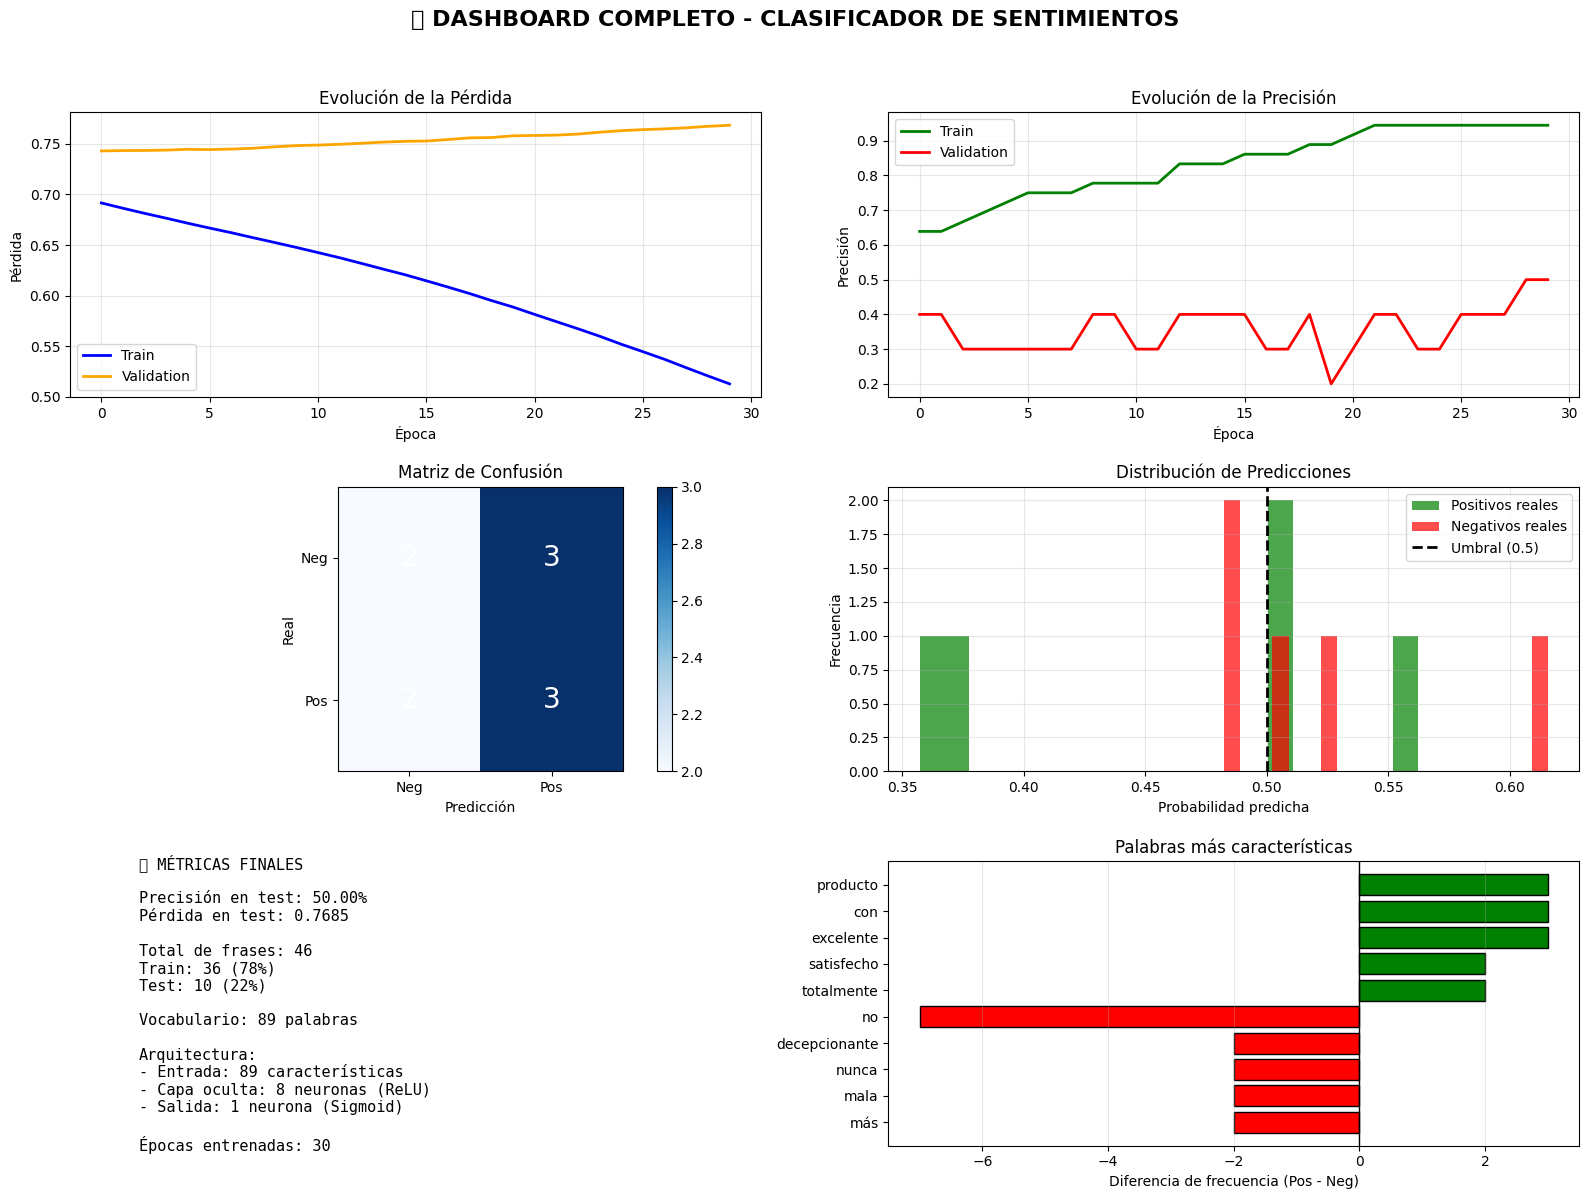


✅ Dashboard completo generado


In [30]:
print("\n🎨 CREANDO DASHBOARD FINAL")
print("="*60)

# Crear figura con múltiples gráficas
fig = plt.figure(figsize=(16, 12))
fig.suptitle('🎯 DASHBOARD COMPLETO - CLASIFICADOR DE SENTIMIENTOS',
             fontsize=16, fontweight='bold', y=0.995)

# 1. Pérdida
plt.subplot(3, 2, 1)
plt.plot(historial.history['loss'], label='Train', linewidth=2, color='blue')
plt.plot(historial.history['val_loss'], label='Validation', linewidth=2, color='orange')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Evolución de la Pérdida')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Precisión
plt.subplot(3, 2, 2)
plt.plot(historial.history['accuracy'], label='Train', linewidth=2, color='green')
plt.plot(historial.history['val_accuracy'], label='Validation', linewidth=2, color='red')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.title('Evolución de la Precisión')
plt.legend()
plt.grid(True, alpha=0.3)

# 3. Matriz de confusión
plt.subplot(3, 2, 3)
plt.imshow(cm, cmap='Blues', interpolation='nearest')
plt.title('Matriz de Confusión')
plt.colorbar()
plt.xticks([0, 1], ['Neg', 'Pos'])
plt.yticks([0, 1], ['Neg', 'Pos'])
plt.xlabel('Predicción')
plt.ylabel('Real')
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center',
                fontsize=20, color='white' if cm[i, j] > cm.max()/2 else 'black')

# 4. Distribución de predicciones
plt.subplot(3, 2, 4)
plt.hist(predicciones[y_test == 1], bins=20, alpha=0.7, label='Positivos reales', color='green')
plt.hist(predicciones[y_test == 0], bins=20, alpha=0.7, label='Negativos reales', color='red')
plt.axvline(x=0.5, color='black', linestyle='--', linewidth=2, label='Umbral (0.5)')
plt.xlabel('Probabilidad predicha')
plt.ylabel('Frecuencia')
plt.title('Distribución de Predicciones')
plt.legend()
plt.grid(True, alpha=0.3)

# 5. Métricas finales (texto)
ax5 = plt.subplot(3, 2, 5)
ax5.axis('off')
metricas_texto = f"""
📊 MÉTRICAS FINALES

Precisión en test: {acc_test:.2%}
Pérdida en test: {loss_test:.4f}

Total de frases: {len(X)}
Train: {len(X_train)} ({len(X_train)/len(X)*100:.0f}%)
Test: {len(X_test)} ({len(X_test)/len(X)*100:.0f}%)

Vocabulario: {len(vocabulario)} palabras

Arquitectura:
- Entrada: {X_train.shape[1]} características
- Capa oculta: 8 neuronas (ReLU)
- Salida: 1 neurona (Sigmoid)

Épocas entrenadas: {len(historial.history['loss'])}
"""
ax5.text(0.1, 0.5, metricas_texto, fontsize=11, family='monospace',
         verticalalignment='center')

# 6. Top palabras positivas vs negativas
# Para que funcione, necesitamos recuperar los nombres de las características del vectorizador
feature_names = np.array(vectorizador.get_feature_names_out())
palabras_pos = X[y == 1].sum(axis=0)
palabras_neg = X[y == 0].sum(axis=0)
diferencia = palabras_pos - palabras_neg
top_pos_idx = diferencia.argsort()[-5:][::-1]
top_neg_idx = diferencia.argsort()[:5]

# Aseguramos que tenemos los nombres correctos
top_palabras_pos = feature_names[top_pos_idx]
top_palabras_neg = feature_names[top_neg_idx]
top_valores_pos = diferencia[top_pos_idx]
top_valores_neg = diferencia[top_neg_idx]

# Concatenamos para graficar
top_palabras = np.concatenate([top_palabras_pos, top_palabras_neg])
top_valores = np.concatenate([top_valores_pos, top_valores_neg])

ax6 = plt.subplot(3, 2, 6)
colores_palabras = ['green']*5 + ['red']*5
ax6.barh(range(10), top_valores, color=colores_palabras, edgecolor='black')
ax6.set_yticks(range(10), top_palabras)
ax6.invert_yaxis() # Muestra la más importante arriba
ax6.set_xlabel('Diferencia de frecuencia (Pos - Neg)')
ax6.set_title('Palabras más características')
ax6.axvline(x=0, color='black', linestyle='-', linewidth=1)
ax6.grid(True, alpha=0.3, axis='x')


plt.tight_layout(rect=[0, 0, 1, 0.97]) # Ajuste para el supertítulo
plt.show()

print("\n✅ Dashboard completo generado")

---

## 🎓 RESUMEN DEL PROYECTO

### ✅ Lo que has logrado:

1. ✅ **Preparar datos**: Dataset de sentimientos balanceado
2. ✅ **Procesar texto**: Bag of Words con CountVectorizer
3. ✅ **Dividir datos**: Train/Test con estratificación
4. ✅ **Construir modelo**: Red neuronal con Keras
5. ✅ **Entrenar**: Ajustar pesos con backpropagation
6. ✅ **Visualizar**: Curvas de aprendizaje
7. ✅ **Evaluar**: Métricas de clasificación
8. ✅ **Predecir**: Clasificar frases nuevas
9. ✅ **Presentar**: Dashboard profesional

### 📊 Pipeline completo:

```
Texto → Vectorización → División → Red Neuronal → Entrenamiento → Evaluación → Predicción
  ↓         ↓              ↓            ↓              ↓              ↓           ↓
Raw    CountVect     Train/Test    Sequential     .fit()      .evaluate()  .predict()
```

---

## 🚀 RETOS ADICIONALES (OPCIONAL)

Si quieres llevar tu modelo al siguiente nivel, prueba estos retos:

### 🏆 RETO 1: Mejorar la precisión

Intenta superar el 95% de precisión modificando:
- Arquitectura del modelo (más capas, más neuronas)
- Hiperparámetros (learning rate, batch size, épocas)
- Añadir más datos al dataset

In [31]:
# RETO 1: Mejorar la Arquitectura del Modelo

print("🚀 RETO 1: Creando un modelo más potente")
print("="*60)

# Crear un modelo con más capas y neuronas
modelo_mejorado = Sequential([
    Dense(16, input_dim=X_train.shape[1], activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compilar el modelo
modelo_mejorado.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("✅ Modelo mejorado creado y compilado:")
modelo_mejorado.summary()
print()

# Entrenar el nuevo modelo
print("🏋️ Entrenando el modelo mejorado...")
historial_mejorado = modelo_mejorado.fit(
    X_train,
    y_train,
    epochs=30,
    batch_size=4,
    validation_data=(X_test, y_test),
    verbose=0  # Usamos 0 para no llenar la salida
)

print("\n✅ ¡Entrenamiento completado!")
print()

# Evaluar el modelo mejorado
loss_mejorado, acc_mejorado = modelo_mejorado.evaluate(X_test, y_test, verbose=0)

print("📊 Resultados del Modelo Mejorado:")
print(f"   Pérdida en test: {loss_mejorado:.4f}")
print(f"   Precisión en test: {acc_mejorado:.2%}")
print()
print(f"Comparación con el modelo base ({acc_test:.2%}): {'Mejor' if acc_mejorado > acc_test else 'Similar/Peor'}")

# Guardamos las nuevas predicciones para el Reto 3
predicciones_mejoradas = modelo_mejorado.predict(X_test, verbose=0)
predicciones_clase_mejoradas = (predicciones_mejoradas > 0.5).astype(int).flatten()

🚀 RETO 1: Creando un modelo más potente
✅ Modelo mejorado creado y compilado:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 16)             │         1,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,585 (6.19 KB)

 Trainable params: 1,585 (6.19 KB)

 Non-trainable params: 0 (0.00 B)


🏋️ Entrenando el modelo mejorado...

✅ ¡Entrenamiento completado!

📊 Resultados del Modelo Mejorado:
   Pérdida en test: 0.8814
   Precisión en test: 30.00%

Comparación con el modelo base (50.00%): Similar/Peor


### 🏆 RETO 2: Añadir regularización

Mejora el modelo añadiendo:
- Dropout (0.3-0.5)
- Regularización L2 (0.01)
- Early Stopping


🚀 RETO 2: Creando un modelo regularizado y robusto
✅ Modelo regularizado creado y compilado:


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 16)             │         1,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,585 (6.19 KB)

 Trainable params: 1,585 (6.19 KB)

 Non-trainable params: 0 (0.00 B)


🏋️ Entrenando con Early Stopping...

✅ ¡Entrenamiento completado en 24 épocas!

📊 Resultados del Modelo Regularizado:
   Pérdida en test: 0.7089
   Precisión en test: 30.00%


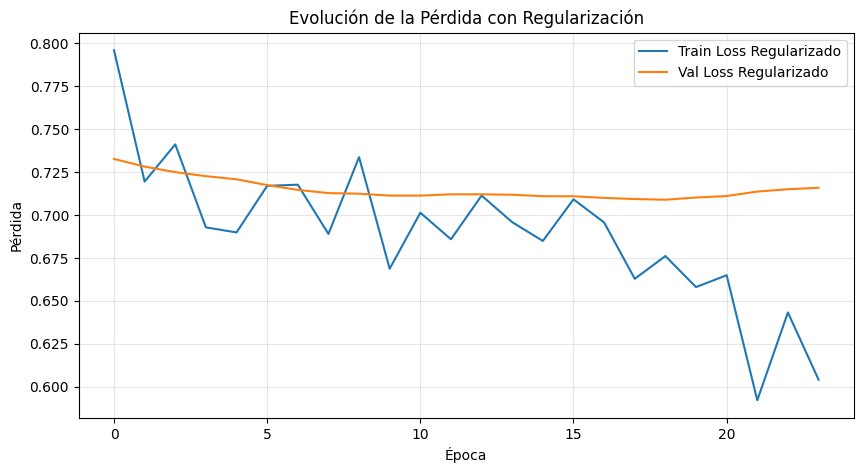

In [32]:
# RETO 2: Añadir Regularización Avanzada

print("\n🚀 RETO 2: Creando un modelo regularizado y robusto")
print("="*60)

# Crear el modelo con Dropout y L2
modelo_regularizado = Sequential([
    Dense(16, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(8, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compilar
modelo_regularizado.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("✅ Modelo regularizado creado y compilado:")
modelo_regularizado.summary()
print()

# Definir el callback de Early Stopping
# Detendrá el entrenamiento si 'val_loss' no mejora en 5 épocas
# y restaurará los mejores pesos encontrados.
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Entrenar (podemos usar más épocas porque Early Stopping lo gestionará)
print("🏋️ Entrenando con Early Stopping...")
historial_regularizado = modelo_regularizado.fit(
    X_train,
    y_train,
    epochs=100,  # Más épocas, Early Stopping decidirá cuándo parar
    batch_size=4,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
    verbose=0
)

print(f"\n✅ ¡Entrenamiento completado en {len(historial_regularizado.history['loss'])} épocas!")
print()

# Evaluar el modelo regularizado
loss_reg, acc_reg = modelo_regularizado.evaluate(X_test, y_test, verbose=0)

print("📊 Resultados del Modelo Regularizado:")
print(f"   Pérdida en test: {loss_reg:.4f}")
print(f"   Precisión en test: {acc_reg:.2%}")

# Visualizar la diferencia
plt.figure(figsize=(10, 5))
plt.plot(historial_regularizado.history['loss'], label='Train Loss Regularizado')
plt.plot(historial_regularizado.history['val_loss'], label='Val Loss Regularizado')
plt.title('Evolución de la Pérdida con Regularización')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### 🏆 RETO 3: Análisis de errores

Identifica qué frases clasifica mal el modelo y por qué.

In [33]:
# RETO 3: Analizar los Errores del Modelo

print("\n🚀 RETO 3: Analizando los errores de clasificación")
print("="*60)

# Para que esto funcione, necesitamos el texto original del conjunto de test.
# La forma más fácil y segura es volver a dividir las frases originales
# con el mismo `random_state` para asegurar que coinciden.
frases_train, frases_test, _, _ = train_test_split(
    todas_frases_ampliado, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("❌ FRASES MAL CLASIFICADAS (usando el modelo mejorado):")
print()

# Usaremos las predicciones del 'modelo_mejorado' (Reto 1)
errores_indices = np.where(predicciones_clase_mejoradas != y_test)[0]

if len(errores_indices) > 0:
    print(f"Total de errores: {len(errores_indices)} de {len(y_test)} ({len(errores_indices)/len(y_test)*100:.1f}%)")
    print("-" * 50)

    # Mostrar hasta 5 errores
    for idx_error in errores_indices[:5]:
        frase_original = frases_test[idx_error]
        real = "Positivo" if y_test[idx_error] == 1 else "Negativo"
        pred = "Positivo" if predicciones_clase_mejoradas[idx_error] == 1 else "Negativo"
        conf = predicciones_mejoradas[idx_error][0]

        print(f"💬 Frase: '{frase_original}'")
        print(f"   - Real: {real}")
        print(f"   - Predicho: {pred} (confianza: {conf:.2%})")
        print()
else:
    print("🎉 ¡Perfecto! No hay errores en el conjunto de test con este modelo.")

print("\n💡 Análisis:")
print("   ¿Por qué pudo fallar el modelo en estas frases?")
print("   - ¿Hay sarcasmo o ironía?")
print("   - ¿Se usan palabras que pueden ser tanto positivas como negativas (ej: 'brutal')?")
print("   - ¿Son frases muy neutras o ambiguas?")


🚀 RETO 3: Analizando los errores de clasificación
❌ FRASES MAL CLASIFICADAS (usando el modelo mejorado):

Total de errores: 7 de 10 (70.0%)
--------------------------------------------------
💬 Frase: 'Estoy muy contento con el servicio recibido'
   - Real: Positivo
   - Predicho: Negativo (confianza: 23.09%)

💬 Frase: 'Terrible servicio'
   - Real: Negativo
   - Predicho: Positivo (confianza: 53.91%)

💬 Frase: 'Producto defectuoso'
   - Real: Negativo
   - Predicho: Positivo (confianza: 58.56%)

💬 Frase: 'Mejor de lo esperado'
   - Real: Positivo
   - Predicho: Negativo (confianza: 21.13%)

💬 Frase: 'Satisfecho completamente'
   - Real: Positivo
   - Predicho: Negativo (confianza: 34.04%)


💡 Análisis:
   ¿Por qué pudo fallar el modelo en estas frases?
   - ¿Hay sarcasmo o ironía?
   - ¿Se usan palabras que pueden ser tanto positivas como negativas (ej: 'brutal')?
   - ¿Son frases muy neutras o ambiguas?


---

## 🎉 ¡FELICIDADES!

### 🏆 HAS COMPLETADO EL CURSO COMPLETO DE DEEP LEARNING

A lo largo de estos 7 notebooks has aprendido:

#### 📚 Fundamentos:
- ✅ NumPy: Manipulación de arrays y matrices
- ✅ Pandas: Organización y exploración de datos
- ✅ Matplotlib: Visualización profesional

#### 🤖 Machine Learning:
- ✅ Procesamiento de texto (NLP básico)
- ✅ Bag of Words y vectorización
- ✅ División train/test correcta

#### 🧠 Deep Learning:
- ✅ Arquitectura de redes neuronales
- ✅ Funciones de activación (ReLU, Sigmoid, Tanh)
- ✅ Optimizadores (Adam, SGD)
- ✅ Funciones de pérdida (Binary Crossentropy)
- ✅ Backpropagation y descenso del gradiente

#### 🛡️ Optimización:
- ✅ Detección de overfitting
- ✅ Dropout
- ✅ Regularización L2
- ✅ Early Stopping

---

## 🚀 PRÓXIMOS PASOS

Ahora que dominas los fundamentos, puedes explorar:

### 📈 Nivel Intermedio:
- 🔤 **Word Embeddings**: Word2Vec, GloVe, FastText
- 📊 **Redes más complejas**: Múltiples salidas, arquitecturas personalizadas
- 🎨 **Transfer Learning**: Usar modelos pre-entrenados

### 🚀 Nivel Avanzado:
- 🔄 **RNNs y LSTMs**: Para secuencias temporales
- 🖼️ **CNNs**: Para visión por computadora
- 🤖 **Transformers**: BERT, GPT, LLMs
- 📱 **Deploy**: Poner modelos en producción

---

## 💪 TU VIAJE CONTINÚA

Este es solo el comienzo. Has construido una base sólida para:
- 🎓 Continuar aprendiendo Deep Learning
- 💼 Aplicar ML en proyectos reales
- 🚀 Explorar áreas avanzadas de IA
- 🌟 Crear soluciones innovadoras

---

## 📝 RECURSOS RECOMENDADOS

- 📖 **Documentación oficial de Keras**: https://keras.io
- 📚 **Deep Learning Book** (Goodfellow et al.)
- 🎓 **Curso de Andrew Ng**: Machine Learning en Coursera
- 💻 **Kaggle**: Competiciones y datasets reales
- 🗣️ **Comunidades**: r/MachineLearning, Stack Overflow

---

## ⭐ AGRADECIMIENTOS

Gracias por completar este curso. Has demostrado:
- 💪 Perseverancia
- 🧠 Capacidad de aprendizaje
- 🎯 Enfoque en la práctica
- 🚀 Disposición para crecer

**¡Sigue adelante y nunca dejes de aprender!**

---

## 🎯 CHECKLIST FINAL

- [ ] Completé los 7 notebooks
- [ ] Entiendo Bag of Words
- [ ] Sé construir redes neuronales con Keras
- [ ] Puedo detectar y solucionar overfitting
- [ ] Creé un clasificador de sentimientos funcional
- [ ] Visualicé resultados con Matplotlib
- [ ] Entiendo el pipeline completo de ML
- [ ] Probé con mis propias frases
- [ ] Exploré los retos adicionales
- [ ] ¡Estoy listo para más proyectos!

---

# 🎊 ¡ENHORABUENA, GRADUADO!

**Has completado el curso de Introducción a Deep Learning con Keras.**

**Ahora eres capaz de:**
- ✅ Procesar datos para Machine Learning
- ✅ Construir y entrenar redes neuronales
- ✅ Evaluar y optimizar modelos
- ✅ Crear aplicaciones de NLP
- ✅ Presentar resultados profesionalmente

**💫 ¡El futuro de la IA está en tus manos!**